# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
# Импортируем библиотеки, которые могут понадобиться в ходе работы
import pandas as pd
import numpy
import matplotlib.pyplot as plt 
import datetime
import calendar
import seaborn

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv')
# print(data)
# Увидели, что данные"склеились", их необходимо разделить:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
print(data)
# Изучим основную информацию о датафрейме:
data.info()
#23699 наблюдений в выборке
# Посмотрим количество пропущенных значений в каждом столбце:
data.isna().sum()
# # Уже видны недочеты, требущие корректировки (например, касательно типов данных, пропусков). О них подробно будет сказано в Шаге 2.
original_dataframe=data.shape[0]
display(original_dataframe)


       total_images  last_price  total_area first_day_exposition  rooms  \
0                20  13000000.0      108.00  2019-03-07T00:00:00      3   
1                 7   3350000.0       40.40  2018-12-04T00:00:00      1   
2                10   5196000.0       56.00  2015-08-20T00:00:00      2   
3                 0  64900000.0      159.00  2015-07-24T00:00:00      3   
4                 2  10000000.0      100.00  2018-06-19T00:00:00      2   
...             ...         ...         ...                  ...    ...   
23694             9   9700000.0      133.81  2017-03-21T00:00:00      3   
23695            14   3100000.0       59.00  2018-01-15T00:00:00      3   
23696            18   2500000.0       56.70  2018-02-11T00:00:00      2   
23697            13  11475000.0       76.75  2017-03-28T00:00:00      2   
23698             4   1350000.0       32.30  2017-07-21T00:00:00      1   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0                2.70 

23699

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


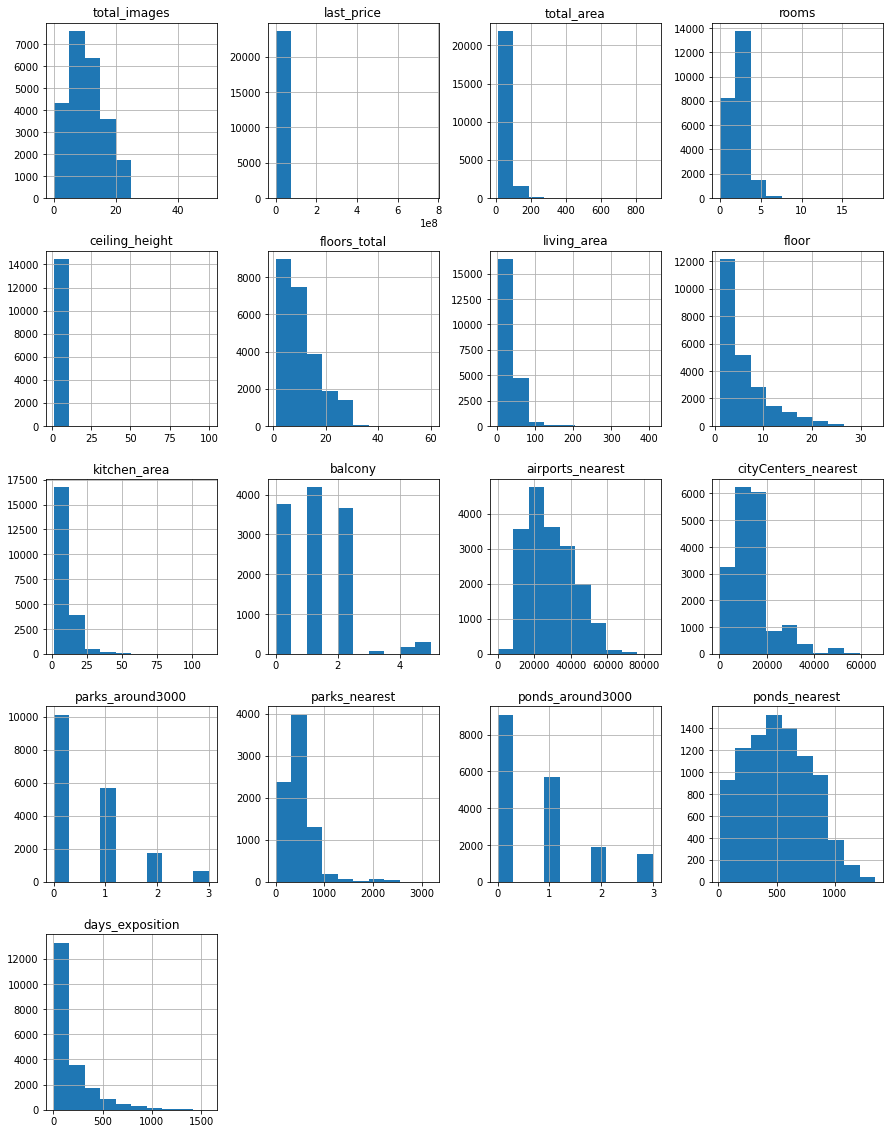

In [3]:
# В Шаге 1 Можно также попробовать построить предварительные гистограммы для всех числовых столбцов таблицы: 
data.hist(figsize=(15,20))
# Некоторые гистограммы выглядят "подозрительно": например, last_price; ceiling_height (не наблюдается "хвоста").
# Стоит также обратиться к методу describe и вывести общие статистические данные по каждому столбцу:
display(data.describe())
# Видны: количество наблюдений в наборе данных по столбцам, среднее арифметическое, стандартное отклонение, 1-3 квартили, минимальные и максимальные значения каждого столбца.


**Помежуточный вывод:**
на данном этапе мы убедились, что необходима предобработка данных вследствие наличия пропусков и некорректных типов данных в ряде столбцов. Также были выведены предварительные графики для каждого столбца и статистическая информация по ним. Некоторые графики выглядят странно; кроме того полезно бы было посмотреть графики на каждый параметр отдельно. Такая работа булет проведена в дальнейших шагах.

### Предобработка данных

**Первые выводы**

С помощью кодов `data.info()` и `data.isna().sum()` мы увидели типы данных всех столбцов и количество пропущенных в них значений.

Первые выводы:

столбец `first_day_exposition` должен иметь тип `datetime64`, так как информация здесь представляет собой даты и время публикации объявления;

в столбцах `floors_total` , `ceiling_height` , `living_area` есть пропуски;

столбец `is_apartment` должен иметь тип `bool` (по условию задачи - это булево знчение), также есть пропуски;

в столбцах `kitchen_area`; `balcony` есть пропуски, также столбец должен иметь тип `int64`, так как количество балконов не может быть дробным; 

в столбцах `locality_name` , `airports_nearest` , `CityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition` есть пропуски;

Столбцы `parks_around3000`, `ponds_around3000` скорее должны быть также целочисленными данными, так как дробное количество парков и водоемов выглядит странно.

**Работа с типами данных и пропусками**

In [4]:
# Попробуем заменить пропуски там, где это возможно.
# Например, пропуски в столбце с данными по числу балконов можно заменить на 0: логично предположить, что, если они не указаны, значит, скорее всего, их нет.
# Заменим сразу и тип данных в столбце:
data['balcony']=data['balcony'].fillna(0).astype('int')
# Причины пропусков в days_exposition: объявление могло быть и не размещено, но заменять такие пропуски или убирать пока не стоит, их довольно много на фоне нашей выборки.
# Столбец first_day_exposition содержит данные о датах и времени, поэтому необходимо изменить тип на datetime64:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
# Предположим, что пропущенные значения в столбце is_apartment означают, что это не апартаменты, и присвоим пропускам значения False:
data['is_apartment']=data['is_apartment'].fillna(False)
# Убедились, что пропуски в вышеперечисленных столбцах теперь отустствуют:
print('data.isna().sum()\n', data.isna().sum())
# Убедились, что некорректные типы данных изменены:
data.info()
# data['parks_around3000'].unique()
# data['ponds_around3000'].unique()
# Ранее было упомянуто, что столбцы `parks_around3000`, `ponds_around3000` скорее должны быть также целочисленными данными, однако, прменив метод unique(), видно, что дробных чисел ни в том, ни в другом столбце нет. Можем оставить как есть.

data.isna().sum()
 total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price          

Для остальных столбцов заменять пропуски на 0 пока рискованно, мы не знаем природу их появления. Кроме того, убрав пропуски мы рискуем избавиться от значимой части массива данных, а это может привести к некорректному анализу данных. 
Среди возможных причин появления пропусков: человеческий фактор; технические неполадки, сбой при записи данных; распознавание текста; объединение/разъединение данных (наример, табличных).
Кроме того, данные могли быть не сообщены изначально или их не удалось выяснить.

**Неявные дубликаты**

Изучим уникальные значения в столбце с названиями населённых пунктов и устраним неявные дубликаты. 

In [5]:
data['locality_name'].unique()
# Согласно заданию '...«поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов.'

data['locality_name'] = data['locality_name'].str.replace('поселок', 'посёлок')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'посёлок')
data['locality_name'] = data['locality_name'].str.replace('посёлок городского типа', 'посёлок')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'посёлок')
data['locality_name'] = data['locality_name'].str.replace('городской посёлок', 'посёлок')
data['locality_name'] = data['locality_name'].str.replace('городской посёлок', 'посёлок')
data['locality_name'] = data['locality_name'].str.replace('посёлок при железнодорожной станции', 'посёлок станции')
data['locality_name'] = data['locality_name'].str.replace('посёлок при станции', 'посёлок станции')
# Стоит предположить, что Мурино и посёлок Мурино также являются неявными дубликатами:
data['locality_name'] = data['locality_name'].str.replace('посёлок Мурино', 'Мурино')
# То же допустим и для Кудрово:
data['locality_name'] = data['locality_name'].str.replace('деревня Кудрово', 'Кудрово')
# Деревню Гарболово и посёлок Гарболово также, по всей видимости, стоит считать неявными дубликатами:
data['locality_name'] = data['locality_name'].str.replace('посёлок Гарболово', 'деревня Гарболово')
# Данные касательно этих трех пунктов были сверены с интернет-картами и статьями, в том числе новостными (вручную). Данных по посёлку Мурино, деревни Кудрово и посёлку Гарболову найти не удалось. 
# В открытых источниках удалось найти информацию только про Мурино, Кудрово и деревню Гарболово.
# Поэтому в данной работе предполагаются именно такие вышеназванные допущения.
data['locality_name'].unique()
# Таким образом, мы заменили неявные дубликаты в существующем столбце 'locality_name'


array(['Санкт-Петербург', 'посёлок Шушары', 'посёлок Янино-1',
       'посёлок Парголово', 'Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'Кудрово', 'Коммунар', 'Колпино',
       'посёлок Красный Бор', 'Гатчина', 'деревня Фёдоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'посёлок Металлострой', 'посёлок Лебяжье', 'посёлок Сиверский',
       'посёлок Молодцово', 'посёлок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'посёлок Ефимовский', 'посёлок Плодовое', 'деревня Заклинье',
       'посёлок Торковичи', 'посёлок Первомайское', 'Красное Село',
       'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посёлок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'д

**Редкие и выбивающиеся значения** 

In [6]:
#Выведем еще раз методом describe() информацию о наших данных по всем столбцам:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Cтолбец `total_images` можем оставить как есть: с типом данных все в порядке, пропусков нет; мы не можем утверждать, что 50 или 0 фотографий-это аномалия и такого не может быть.

То же самое допустим для столбцов: `days_exposition`, `ponds_nearest`, `ponds_around3000`, `parks_nearest`, `parks_around3000`, `cityCenters_nearest`, `airports_nearest`, `total_area`, `floor`. Максимальные и минимальные значения здесь также выглядят адекватно.

Предлагается с вышеназванными столбцами работу по предобработке данных с точки зрения выбросов и аномалий завершить.

Столбец `balcony`: необходимо изучить более детально на предмет превышения количества балконов в квартире над комнатами.

In [7]:
#Подробнее рассмотрим столбец 'last_price', из описательной статистики видно, что минимум составил 12190, а максимум 763000000. Данные по минимуму выглядят слишком не реалистично, вряд ли квартира может стоить 12 190.
# Можем значение с минимумом удалить.
data.query('last_price < 100000')
data = data[(data.last_price > 100000)]

# Изучим квартиры по ценам от 100 000 до 1 000 000:
filtered_data=(data.query('100000<=last_price<=1000000'))

#print(filtered_data)
# Имеются квартиры со стоимостями от 100 000 до 1 000 000, но их удалять без согласования с коллегами не стоит.

# Выведем строки, где цены на квартиры оказались дешевле (или равно) 1 000 000, чтобы можно было понаблюдать за другими параметрами:
data.loc[data.loc[:, 'last_price']<=1000000]
# Учитывая, что площадь таких квартир небольшая, а также тот факт, что они находятся не в самом Санкт-Петербурге, можно попробовать предположить, что такие цены имеют место быть.

# Данные по квартирам дороже 1 000 000 000 и дешевле 100 000 000 000:
data.query('1000000<last_price<=100000000')
# Таких большинство

# Данные по квартирам дороже 100 000 000:
display(data.query('last_price>100000000'))
# 37 квартир дороже 100 000 000: можно предположить, что значения цены квартиры слишком большие, но пока убирать не будем.

data = data[(data.last_price < 100000000)]
data.describe()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
793,20,135000000.0,310.0,2018-05-22,4,3.30,5.0,250.00,2,False,...,50.00,0,Санкт-Петербург,34159.0,7251.0,2.0,295.0,3.0,190.0,342.0
1026,20,155000000.0,310.0,2018-10-12,5,5.30,3.0,190.00,3,False,...,63.00,2,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
1188,20,118000000.0,290.6,2018-06-01,6,3.82,6.0,188.70,3,False,...,22.00,1,Санкт-Петербург,25309.0,6224.0,1.0,217.0,0.0,NaN,316.0
1300,14,120000000.0,280.0,2018-07-12,5,4.70,4.0,162.00,3,False,...,30.00,0,Санкт-Петербург,24680.0,4247.0,1.0,464.0,3.0,339.0,225.0
1436,19,330000000.0,190.0,2018-04-04,3,3.50,7.0,95.00,5,False,...,40.00,0,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0
1928,11,125000000.0,224.5,2017-01-24,4,NaN,4.0,163.50,3,False,...,30.00,1,Санкт-Петербург,22805.0,2335.0,0.0,NaN,2.0,497.0,174.0
2243,9,130278280.0,304.0,2015-07-24,5,3.11,9.0,NaN,7,False,...,NaN,0,Санкт-Петербург,25593.0,5913.0,2.0,164.0,0.0,NaN,599.0
2536,16,159984000.0,242.4,2015-08-27,4,3.85,9.0,131.00,7,False,...,20.00,0,Санкт-Петербург,21946.0,2242.0,1.0,679.0,1.0,227.0,501.0
3117,19,140000000.0,631.0,2019-03-30,7,NaN,5.0,NaN,5,False,...,60.00,0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
4996,20,124000000.0,124.5,2017-10-12,4,3.00,4.0,67.20,2,False,...,20.00,0,Санкт-Петербург,20399.0,1722.0,3.0,302.0,3.0,172.0,45.0


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23661.000000,2.366100e+04,23661.000000,23661.000000,14478.000000,23575.000000,21763.000000,23661.000000,21389.000000,23661.000000,18120.000000,18143.000000,18144.000000,8052.000000,18144.000000,9077.000000,20485.000000
mean,9.849372,6.251771e+06,59.925974,2.065720,2.769863,10.679194,34.251736,5.892228,10.526017,0.591268,28797.970475,14211.298628,0.609513,491.087432,0.767747,518.659579,180.649939
std,5.679430,6.424397e+06,33.470704,1.069614,1.261192,6.598674,21.175637,4.885161,5.743847,0.959143,12641.796992,8605.150486,0.800099,342.670330,0.936479,277.794757,219.559366
min,0.000000,4.300000e+05,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.510000,5.000000,18.600000,2.000000,7.000000,0.000000,18573.750000,9267.000000,0.000000,288.000000,0.000000,295.000000,45.000000
50%,9.000000,4.635000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26737.000000,13114.000000,0.000000,455.000000,1.000000,503.000000,95.000000
75%,14.000000,6.750000e+06,69.600000,3.000000,2.800000,16.000000,42.200000,8.000000,12.000000,1.000000,37294.000000,16297.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,9.900000e+07,590.000000,19.000000,100.000000,60.000000,409.000000,33.000000,107.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [8]:
#Столбец rooms
#Посмотрим общее количество данных по недвижимости с 0 комнатами (видим по минимуму, что такие есть)
data.query('rooms==0')['rooms'].count()
#Их 197

filter_data=data.loc[data.loc[:, 'rooms']==0]
#Можем, например, изучить апартаменты ли эти объекты недвижимости или нет:
filter_data['is_apartment'].unique()
#По всем показателям, где комнаты=0, is_apartment False. Это не апартаменты.

data.query('rooms==0 and open_plan')['rooms'].count()
# 59 объектов недвижимости-open space.

data.query('rooms==0 and studio')['rooms'].count()
# 138 объектов недвижимости с планировкой студия
# Складывая 138 и 59, как раз получаем 197, так что похоже мы имеем дело с квартирами-студиями или с квартирами со свободной планировкой.
# Удалять данные с 0 комнатами не будем.

print(pd.Series(data['rooms']).value_counts())

#Уберем из выборки квартиры с количеством комнат больше или равно 10
data = data[(data.rooms < 10)]

current_dataframe=data.shape[0]
print(current_dataframe)

#data.describe()

1     8047
2     7938
3     5810
4     1171
5      316
0      197
6      100
7       54
8       10
9        8
10       3
11       2
14       2
16       1
19       1
15       1
Name: rooms, dtype: int64
23651


In [9]:
# Столбец total_area

# Уберем из выборки квартиры общей площадью более 300 м2
data = data[(data.total_area < 300)]
current_dataframe=data.shape[0]
print(current_dataframe)

23607


In [10]:
# Столбец ceiling_height
data['ceiling_height'].unique()
data.describe()
data.query('1<=ceiling_height<2')['ceiling_height'].count()


# Предположим, что потолки высотой менее 2 м нормой быть не может; выведем эти данные и удалим:
data.query('1<=ceiling_height<2')

# # Максимальное значение здесь 1,75 и квартир с потолками менее 2 метров всего 3; предлагается эти 3 удалить, предварительно заменив пропуски на медианные значения:
data['ceiling_height']=data['ceiling_height'].fillna(data['ceiling_height'].median())
data.query('1<=ceiling_height<=2')
data = data[(data.ceiling_height >= 2)]


# Будем считать, что норма - это квартиры с потолками от 2 метров до 20 (не включая значение 20):
data.query('2<=ceiling_height<20')

# Допустим, что высота потолков выше или равна 20 метров-это опечатка и разделим эти значения на 10.
# Из общей статистики было видно, что максимальное значение высоты потолка - 100 м, поэтому берем данные от 20 м до 100 м:
data.query('20<=ceiling_height<=100')
data['ceiling_height']=numpy.where(data['ceiling_height']>=20, data['ceiling_height']/10, data['ceiling_height'])

data['ceiling_height'].describe()
#Проверяем себя:
data['ceiling_height'].unique()


array([ 2.7 ,  2.65,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  3.2 ,  2.61,  3.25,  3.45,  2.77,
        2.85,  2.64,  2.57,  4.15,  3.3 ,  2.71,  4.  ,  2.47,  2.73,
        2.84,  3.1 ,  2.34,  3.4 ,  3.5 ,  3.06,  2.72,  2.54,  2.51,
        2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,  2.59,
        2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,
        3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.  ,  2.79,  2.95,
        4.06,  2.94,  3.54,  3.53,  2.83,  2.4 ,  3.38,  3.01,  3.65,
        3.18,  3.35,  2.3 ,  3.57,  2.48,  2.62,  2.82,  3.98,  2.63,
        3.83,  3.52,  3.95,  3.75,  2.88,  3.67,  3.87,  3.66,  4.19,
        3.24,  4.8 ,  4.5 ,  4.2 ,  3.36,  3.86,  3.08,  3.68,  3.07,
        3.37,  3.09,  8.  ,  3.16,  3.26,  3.34,  2.81,  3.44,  2.97,
        4.37,  2.68,  3.9 ,  3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,
        3.33,  3.63,  3.14,  3.32,  8.3 ,  2.98,  2.86,  3.17,  4.4 ,
        3.28,  3.04,

In [11]:
# Столбец floors_total
# В нашей выборке присутствуют объекты недвижимости с минимум 1 и максимум 60 этажами. Выглядит правдоподобно, можем просмотреть уникальные значения:
data['floors_total'].unique()
# Странных значений не обнаружено; оставляем столбец как есть.

data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23604.000000,2.360400e+04,23604.000000,23604.000000,23604.000000,23518.000000,21715.000000,23604.000000,21341.000000,23604.000000,18067.000000,18088.000000,18089.000000,8014.000000,18089.000000,9044.000000,20441.000000
mean,9.847526,6.160827e+06,59.226415,2.053889,2.696791,10.688962,33.892941,5.895103,10.481944,0.592103,28805.271711,14227.874337,0.607717,491.206264,0.766709,519.183989,180.470770
std,5.677093,6.041446e+06,29.861866,1.028457,0.247215,6.598006,19.417846,4.887768,5.612083,0.959431,12651.180377,8602.411953,0.798549,342.748343,0.935784,277.810359,219.330814
min,0.000000,4.300000e+05,12.000000,0.000000,2.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18557.000000,9289.000000,0.000000,288.000000,0.000000,295.000000,45.000000
50%,9.000000,4.600000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26758.000000,13123.000000,0.000000,455.000000,0.000000,503.000000,95.000000
75%,14.000000,6.736700e+06,69.200000,3.000000,2.700000,16.000000,42.100000,8.000000,12.000000,1.000000,37310.000000,16301.500000,1.000000,612.000000,1.000000,732.000000,231.000000
max,50.000000,9.900000e+07,297.500000,9.000000,14.000000,60.000000,250.000000,33.000000,107.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [12]:
# В выборке присутствует 4 объекта недвижимости с жилой площадью менее 5 м2:
data.query('living_area<=5')
# living area аномально низкая, удалим эти 2 строки, предварительно заменив пропуски на медианное значение:
data['living_area']=data['living_area'].fillna(data['living_area'].median())
data = data[(data.living_area > 5)]
# Большинство квартир с жилой площадью от 5 до 100 м2
data.query('5<living_area<=100')
# 257 квартир с жилой площадью более 100 м2 до 409,7 м2:
data.query('living_area>100')

data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23599.000000,2.359900e+04,23599.000000,23599.000000,23599.000000,23513.000000,23599.000000,23599.000000,21338.00000,23599.000000,18063.000000,18084.000000,18085.000000,8012.000000,18085.000000,9041.000000,20436.000000
mean,9.847409,6.158709e+06,59.227226,2.054070,2.696771,10.687832,33.587873,5.893936,10.48173,0.592101,28805.687261,14228.965052,0.607741,491.146031,0.766602,519.161155,180.479546
std,5.676849,6.029833e+06,29.858327,1.028351,0.247225,6.597254,18.651206,4.886523,5.61234,0.959462,12652.229254,8602.927289,0.798601,342.766091,0.935720,277.769604,219.352683
min,0.000000,4.300000e+05,12.000000,0.000000,2.000000,1.000000,5.400000,1.000000,1.30000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.00000,0.000000,18557.000000,9289.000000,0.000000,288.000000,0.000000,295.000000,45.000000
50%,9.000000,4.600000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.10000,0.000000,26758.000000,13123.000000,0.000000,455.000000,0.000000,503.000000,95.000000
75%,14.000000,6.737800e+06,69.200000,3.000000,2.700000,16.000000,41.000000,8.000000,12.00000,1.000000,37310.000000,16306.500000,1.000000,612.000000,1.000000,732.000000,231.000000
max,50.000000,9.900000e+07,297.500000,9.000000,14.000000,60.000000,250.000000,33.000000,107.00000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [13]:
# Столбец kitchen_area
data.query('1<=kitchen_area<2')
# Квартиры с кухнями до 2 м2 выглядят немного странно, предлагается удалить, предварительно заменив пропуски на медианное значение
data['kitchen_area']=data['kitchen_area'].fillna(data['kitchen_area'].median())
data = data[(data.kitchen_area >= 2)]

# Из общей статистики видно, что максимум площади кухни по выборке - 112 м2; посмотрим оставшиеся данные:
data.query('2<kitchen_area<=50')
data.query('50<kitchen_area<=112')
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23598.000000,2.359800e+04,23598.000000,23598.000000,23598.000000,23512.000000,23598.000000,23598.000000,23598.000000,23598.000000,18062.000000,18083.000000,18084.000000,8012.000000,18084.000000,9041.000000,20436.000000
mean,9.847529,6.158790e+06,59.228528,2.054115,2.696767,10.687691,33.588470,5.893762,10.349731,0.592126,28805.222567,14229.048443,0.607775,491.146031,0.766645,519.161155,180.479546
std,5.676939,6.029948e+06,29.858289,1.028350,0.247229,6.597359,18.651376,4.886553,5.351966,0.959475,12652.425364,8603.157863,0.798610,342.766091,0.935728,277.769604,219.352683
min,0.000000,4.300000e+05,12.000000,0.000000,2.000000,1.000000,5.400000,1.000000,2.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.300000,0.000000,18557.000000,9289.000000,0.000000,288.000000,0.000000,295.000000,45.000000
50%,9.000000,4.600000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26757.500000,13123.000000,0.000000,455.000000,0.000000,503.000000,95.000000
75%,14.000000,6.738900e+06,69.200000,3.000000,2.700000,16.000000,41.000000,8.000000,11.400000,1.000000,37310.000000,16307.000000,1.000000,612.000000,1.000000,732.000000,231.000000
max,50.000000,9.900000e+07,297.500000,9.000000,14.000000,60.000000,250.000000,33.000000,107.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [14]:
# Из общей статистики видно, что есть квартира с расстоянием до аэропорта
data.loc[data.loc[:, 'airports_nearest']==0]
# Вряд ли квартира может располагаться в аэропорту; предлагается удалить 1 строку с расстоянием квартиры до аэропорта 0 метров, предварительно заменив пропуски на медианное значение:
data['airports_nearest']=data['airports_nearest'].fillna(data['airports_nearest'].median())
data = data[(data.airports_nearest > 0)]

data.describe()


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23597.000000,2.359700e+04,23597.000000,23597.000000,23597.000000,23511.000000,23597.000000,23597.000000,23597.000000,23597.000000,23597.000000,18082.000000,18083.000000,8012.000000,18083.000000,9041.000000,20435.000000
mean,9.847947,6.158754e+06,59.229567,2.054159,2.696767,10.687763,33.589055,5.893885,10.349916,0.592067,28326.035089,14228.574383,0.607808,491.146031,0.766687,519.161155,180.485442
std,5.676697,6.030073e+06,29.858495,1.028348,0.247235,6.597490,18.651555,4.886620,5.352005,0.959452,11101.864661,8603.159573,0.798620,342.766091,0.935737,277.769604,219.356431
min,0.000000,4.300000e+05,12.000000,0.000000,2.000000,1.000000,5.400000,1.000000,2.000000,0.000000,6450.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.300000,0.000000,21157.000000,9289.000000,0.000000,288.000000,0.000000,295.000000,45.000000
50%,9.000000,4.600000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26757.500000,13123.000000,0.000000,455.000000,0.000000,503.000000,95.000000
75%,14.000000,6.735600e+06,69.200000,3.000000,2.700000,16.000000,41.000000,8.000000,11.400000,1.000000,34401.000000,16304.500000,1.000000,612.000000,1.000000,732.000000,231.000000
max,50.000000,9.900000e+07,297.500000,9.000000,14.000000,60.000000,250.000000,33.000000,107.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [15]:
# Столбец balcony:
# В столбцах, где количество балконов превышает количество комнат, заменим значение балконов на равные значения комнат (т.е. сколько комнат, столько и балконов в тех случаях, где балконов больше комнат).
data.query('balcony>3')
for index, row in data.iterrows():
    if(row['balcony']>row['rooms']):
        data.loc[index, 'balcony']=row['rooms']
 

In [16]:
data.query('balcony>3')
data.query('rooms==1')
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23597.000000,2.359700e+04,23597.000000,23597.000000,23597.000000,23511.000000,23597.000000,23597.000000,23597.000000,23597.000000,23597.000000,18082.000000,18083.000000,8012.000000,18083.000000,9041.000000,20435.000000
mean,9.847947,6.158754e+06,59.229567,2.054159,2.696767,10.687763,33.589055,5.893885,10.349916,0.479256,28326.035089,14228.574383,0.607808,491.146031,0.766687,519.161155,180.485442
std,5.676697,6.030073e+06,29.858495,1.028348,0.247235,6.597490,18.651555,4.886620,5.352005,0.738794,11101.864661,8603.159573,0.798620,342.766091,0.935737,277.769604,219.356431
min,0.000000,4.300000e+05,12.000000,0.000000,2.000000,1.000000,5.400000,1.000000,2.000000,0.000000,6450.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.300000,0.000000,21157.000000,9289.000000,0.000000,288.000000,0.000000,295.000000,45.000000
50%,9.000000,4.600000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26757.500000,13123.000000,0.000000,455.000000,0.000000,503.000000,95.000000
75%,14.000000,6.735600e+06,69.200000,3.000000,2.700000,16.000000,41.000000,8.000000,11.400000,1.000000,34401.000000,16304.500000,1.000000,612.000000,1.000000,732.000000,231.000000
max,50.000000,9.900000e+07,297.500000,9.000000,14.000000,60.000000,250.000000,33.000000,107.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Промежуточный вывод:**
на данном шаге мы постарались избавиться от пропусков в тех столбцах, где замена была возможна (столбцы `balcony`, `is_apartment`, `ceiling_height`. Кроме того, были заменены типы данных в столбцах `first_day_exposition`, `balcony`, `is_apartment`. Затем была проведена работа по устранению неявных дубликатов в столбце `locality_name`. Потребовалось также понаблюдать за выбивающимся значением в каждом столбце, в результате чего в ряде столбцов были обработаны (как например, в столбце `celing_height`, `balcony`) или удалены некоторые строки. В результате удаления строк выборка практически "не пострадала", так как мы оставили 99,5% данных.

### Посчитайте и добавьте в таблицу новые столбцы

**Цена одного квадратного метра**

In [17]:
data['price_per_meter']=data['last_price']/data['total_area']
data['price_per_meter']
data['price_per_meter'].describe()

count     23597.000000
mean      98487.038339
std       42897.589213
min        7962.962963
25%       76530.612245
50%       94907.407407
75%      114035.087719
max      848484.848485
Name: price_per_meter, dtype: float64

In [18]:
# Столбец first_day_exposition
# Добавим столбец Weekday, который покажет нам конкретные дни недели публикации объявления.

data['Weekday']=data['first_day_exposition'].dt.strftime('%A')

# День недели публикации объявления
data['Weekday'] = data['Weekday'].str.replace('Monday', '0')
data['Weekday'] = data['Weekday'].str.replace('Tuesday', '1')
data['Weekday'] = data['Weekday'].str.replace('Wednesday', '2')
data['Weekday'] = data['Weekday'].str.replace('Thursday', '3')
data['Weekday'] = data['Weekday'].str.replace('Friday', '4')
data['Weekday'] = data['Weekday'].str.replace('Saturday', '5')
data['Weekday'] = data['Weekday'].str.replace('Sunday', '6')

# Месяц публикации
data['Month']=data['first_day_exposition'].dt.strftime('%-m')
data['Month'].unique()
# Год публикации
data['Year']=data['first_day_exposition'].dt.strftime('%Y')
data['Year'].unique()
print(data)

       total_images  last_price  total_area first_day_exposition  rooms  \
0                20  13000000.0      108.00           2019-03-07      3   
1                 7   3350000.0       40.40           2018-12-04      1   
2                10   5196000.0       56.00           2015-08-20      2   
3                 0  64900000.0      159.00           2015-07-24      3   
4                 2  10000000.0      100.00           2018-06-19      2   
...             ...         ...         ...                  ...    ...   
23694             9   9700000.0      133.81           2017-03-21      3   
23695            14   3100000.0       59.00           2018-01-15      3   
23696            18   2500000.0       56.70           2018-02-11      2   
23697            13  11475000.0       76.75           2017-03-28      2   
23698             4   1350000.0       32.30           2017-07-21      1   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0                2.70

In [19]:
# Категоризируем этажи на группы: "первый", "последний", "другой":

data['floor_category']=data.apply(
    lambda x: 'первый' if (x.floor==1)
    else ('последний' if (x.floor==x.floors_total)&isinstance(x.floors_total, float)
    else 'другой'), axis=1
)


data['floor_category'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

In [20]:
data['rounded_centre_distance']=(data['cityCenters_nearest']/1000).round()
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,rounded_centre_distance
count,23597.000000,2.359700e+04,23597.000000,23597.000000,23597.000000,23511.000000,23597.000000,23597.000000,23597.000000,23597.000000,23597.000000,18082.000000,18083.000000,8012.000000,18083.000000,9041.000000,20435.000000,23597.000000,18082.000000
mean,9.847947,6.158754e+06,59.229567,2.054159,2.696767,10.687763,33.589055,5.893885,10.349916,0.479256,28326.035089,14228.574383,0.607808,491.146031,0.766687,519.161155,180.485442,98487.038339,14.221878
std,5.676697,6.030073e+06,29.858495,1.028348,0.247235,6.597490,18.651555,4.886620,5.352005,0.738794,11101.864661,8603.159573,0.798620,342.766091,0.935737,277.769604,219.356431,42897.589213,8.611218
min,0.000000,4.300000e+05,12.000000,0.000000,2.000000,1.000000,5.400000,1.000000,2.000000,0.000000,6450.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,7962.962963,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.300000,0.000000,21157.000000,9289.000000,0.000000,288.000000,0.000000,295.000000,45.000000,76530.612245,9.000000
50%,9.000000,4.600000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26757.500000,13123.000000,0.000000,455.000000,0.000000,503.000000,95.000000,94907.407407,13.000000
75%,14.000000,6.735600e+06,69.200000,3.000000,2.700000,16.000000,41.000000,8.000000,11.400000,1.000000,34401.000000,16304.500000,1.000000,612.000000,1.000000,732.000000,231.000000,114035.087719,16.000000
max,50.000000,9.900000e+07,297.500000,9.000000,14.000000,60.000000,250.000000,33.000000,107.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,848484.848485,66.000000


**Промежуточный вывод:**
были добавлены новые столбцы, которые будут необходимы нам для дальнейшего анализа. Новые столбцы `price_per_meter`, `Weekday`, `Month`, `Year`, `floor_category` и `rounded_centre_distance` показывают сведения о цене квадратного метра; дне, месяце, годе публикации; типе этажа квартиры и округленном расстоянии квартиры до центра города в км.

### Проведите исследовательский анализ данных

<AxesSubplot:ylabel='Frequency'>

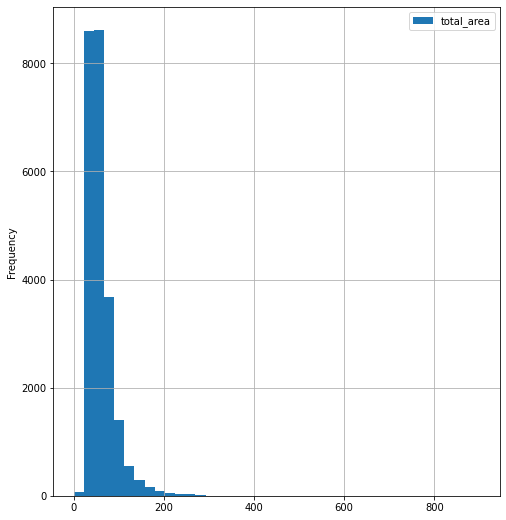

In [21]:
#data.plot(y='total_area', kind='hist', bins=40, grid=True, range=(0, 400), figsize=(8,9))
data.plot(y='total_area', kind='hist', bins=40, grid=True, range=(0, 900), figsize=(8,9))
#data.plot(y='total_area', kind='hist', bins=40, grid=True, range=(200, 900), figsize=(8,9))

Наиболее часто встречающиеся объявления - это объявления с квартрами общей площадью около 50м2; длинный "правый хвост" свидетельствует о снижающемся количестве квартир с бОльшими площадями.

<AxesSubplot:ylabel='Frequency'>

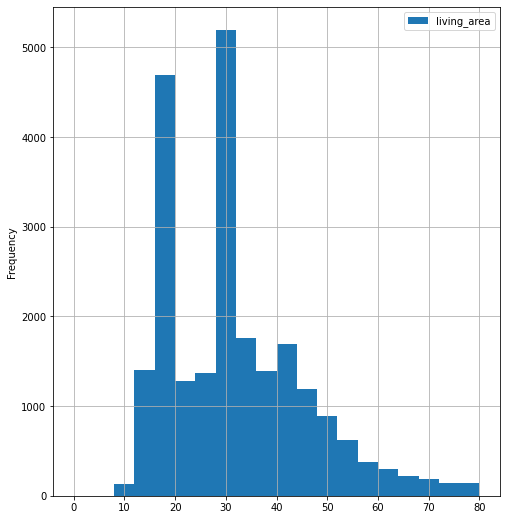

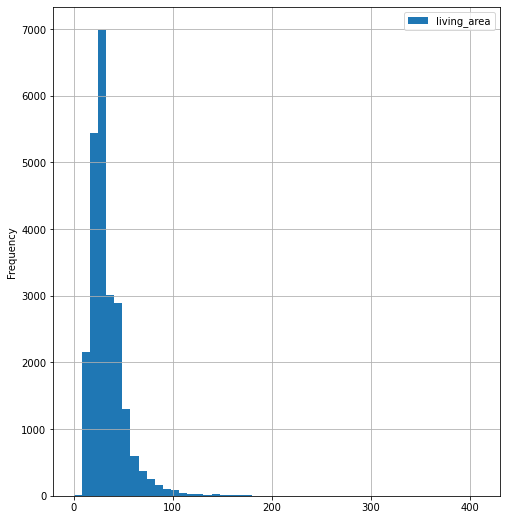

In [22]:
# Построим график, чтобы лучше проследить масштаб и количество квартир:
data.plot(y='living_area', kind='hist', bins=20, grid=True, range=(0, 80), figsize=(8,9))
# Построим график, чтобы увидеть общую картину:
data.plot(y='living_area', kind='hist', bins=50, grid=True, range=(0, 410), figsize=(8,9))

БОльшая часть квартир имеет жилую площадь от чуть более 10 до 50м2.
При это прослеживаются большие количества наблюдений в районе квартир с жилой площадью около 18-20 м2 и 30м2.

<AxesSubplot:ylabel='Frequency'>

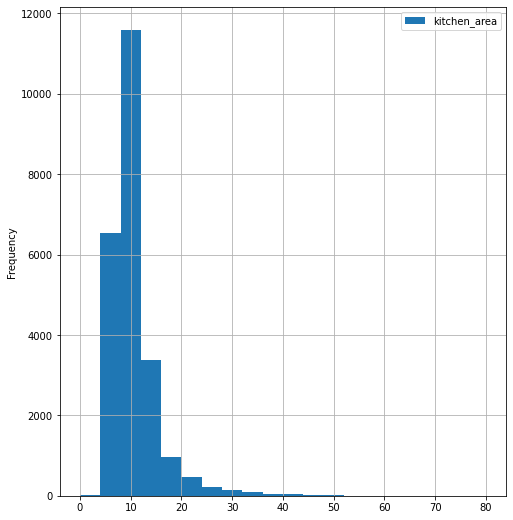

In [23]:
data.plot(y='kitchen_area', kind='hist', bins=20, grid=True, range=(0, 80), figsize=(8,9))

Большинство квартир в нашей выборке - это квартиры с кухонной площадью от 5м2 до 15м2.
При этом наиболее встречающееся значение - это квартиры с кухней в районе 10м2.

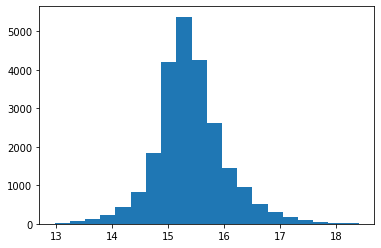

8886110.520507872

In [24]:
#data.plot(y='last_price', kind='hist', bins=20, grid=True, figsize=(8,9))
# В таком виде гистограмма выглядит неинформативно; приблизим левую часть на диапазоне от о до 100 000 000
#data.plot(y='last_price', kind='hist', bins=20, grid=True, range=(0, 100000000), figsize=(8,9))
# Предлагается прологарифмировать:
plt.hist(numpy.log(data['last_price']), bins=20)
plt.show()
# Пик логарифма цены наблюдается в районе 15-16 
numpy.exp(15)
numpy.exp(16)

Наиболее часто встречающиеся значения - это квартиры с ценами примерно от чуть более 3 до чуть менее 9 млн руб.

<AxesSubplot:ylabel='Frequency'>

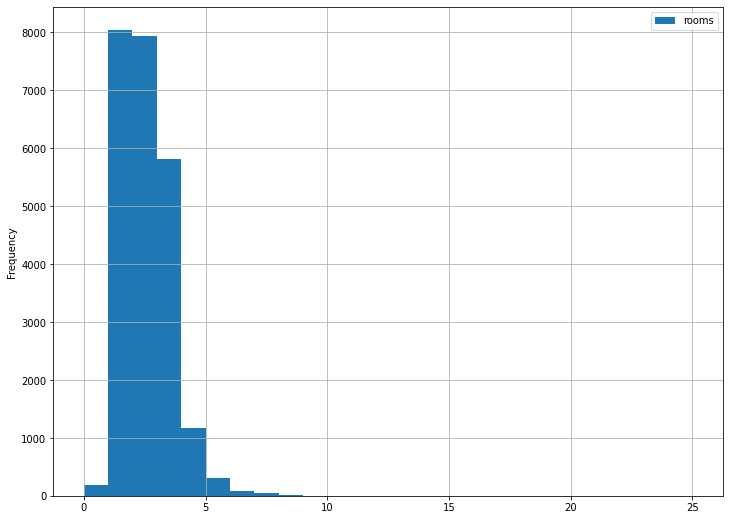

In [25]:
data.plot(y='rooms', kind='hist', bins=25, grid=True, range=(0, 25), figsize=(12,9))

Большинство квартир - квартиры, где количество комнат не превосходит 3; наиболее часто встречающееся значение - квартиры с 1 комнатой.

<AxesSubplot:ylabel='Frequency'>

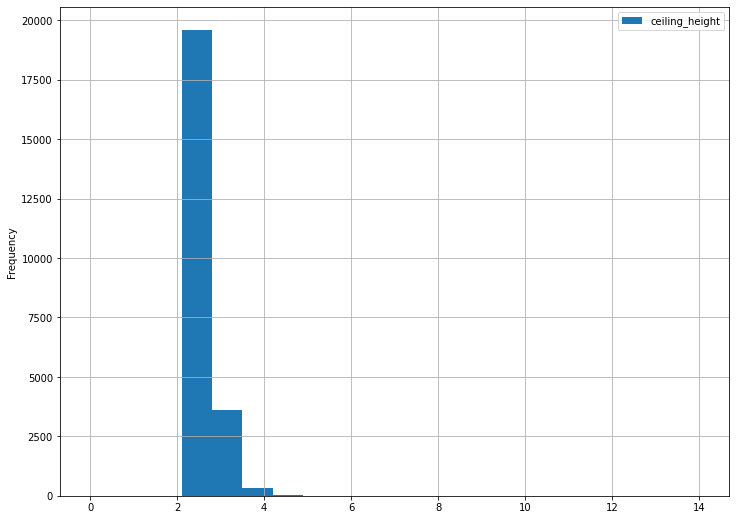

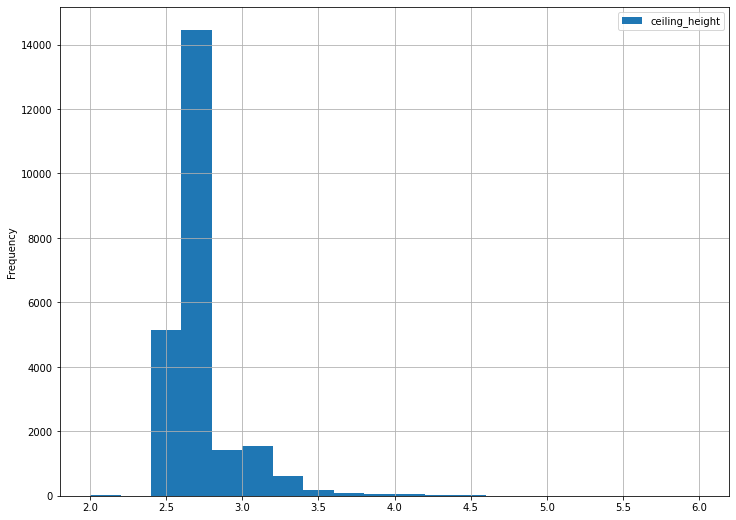

In [26]:
# Построим общую гистограмму:
data.plot(y='ceiling_height', kind='hist', bins=20, grid=True, range=(0, 14), figsize=(12,9))
# Сменим масштаб для наглядности и более подробной интерпретации:
data.plot(y='ceiling_height', kind='hist', bins=20, grid=True, range=(2, 6), figsize=(12,9))

Наиболее популярны квартиры с потолками высотой от 2,5 до 3 м.

<AxesSubplot:ylabel='Frequency'>

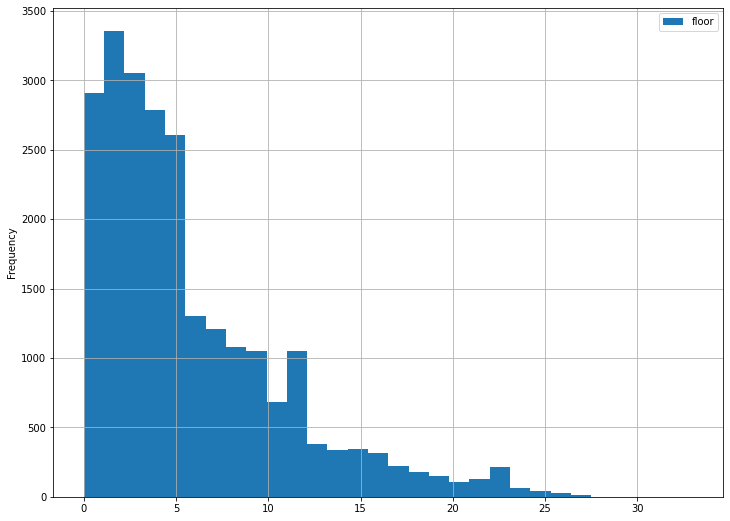

In [27]:
data.plot(y='floor', kind='hist', bins=30, grid=True, range=(0, 33), figsize=(12,9))

Наиболее попупярны квартиры на 2 этаже; также большое количество квартир наблюдаются на 1, 3, 4, 5.

<AxesSubplot:ylabel='Frequency'>

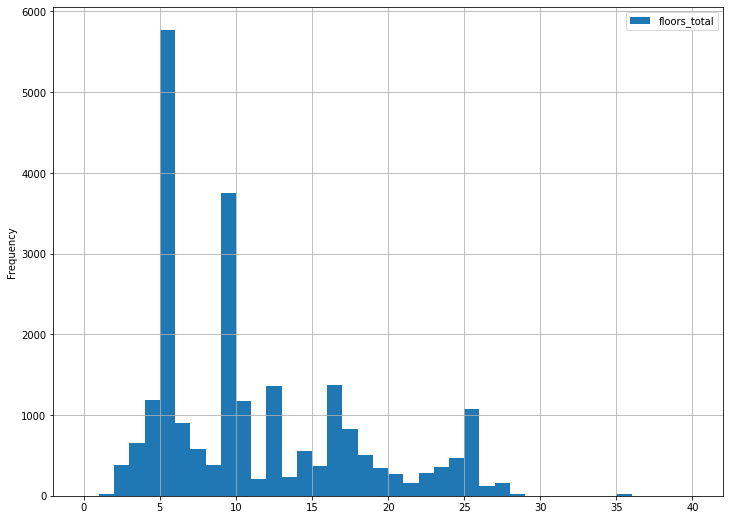

In [28]:
data.plot(y='floors_total', kind='hist', bins=40, grid=True, range=(0, 40), figsize=(12,9))

Наиболее популярные квартиры находятся в пятиэтажных домах, далее идут девятиэтажные.

<AxesSubplot:xlabel='floor_category', ylabel='count'>

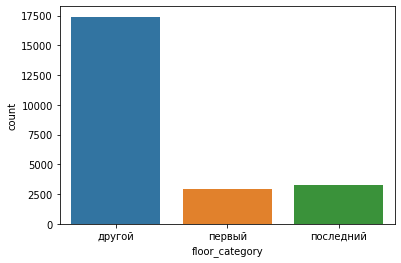

In [29]:

seaborn.countplot(x='floor_category', data=data)

Наиболее популярные квартиры - это квартиры ни на 1, ни на последнем этаже.

<AxesSubplot:ylabel='Frequency'>

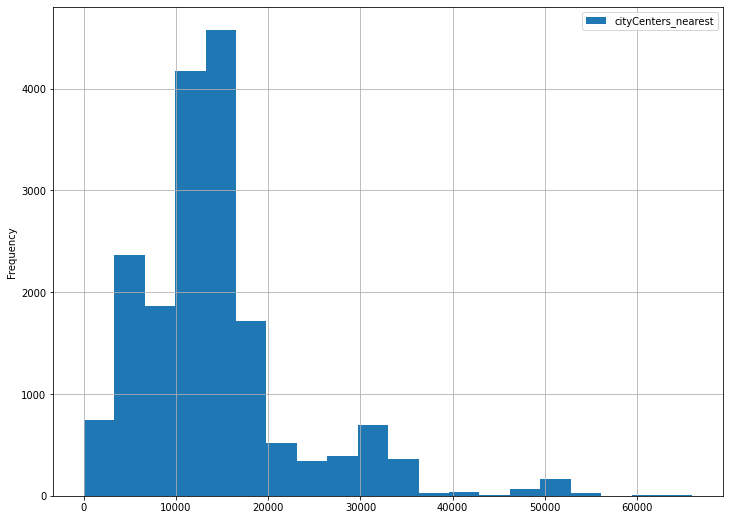

In [30]:
data.plot(y='cityCenters_nearest', kind='hist', bins=20, grid=True, range=(0, 66000), figsize=(12,9))

Наиболее популярны квартиры с расстоянием до центра примерно 15 000 м.

<AxesSubplot:ylabel='Frequency'>

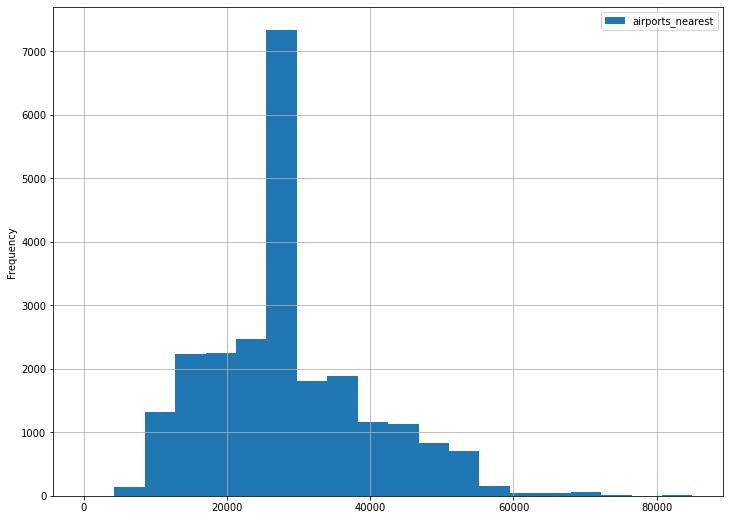

In [31]:
data.plot(y='airports_nearest', kind='hist', bins=20, grid=True, range=(0, 85000), figsize=(12,9))

Наиболее часто в нашей выборке встречаются квартиры с расстоянием до аэропорта около 30 000 м.
Почти все квартиры расположены не более, чем в 60 км до аэропорта. 

<AxesSubplot:ylabel='Frequency'>

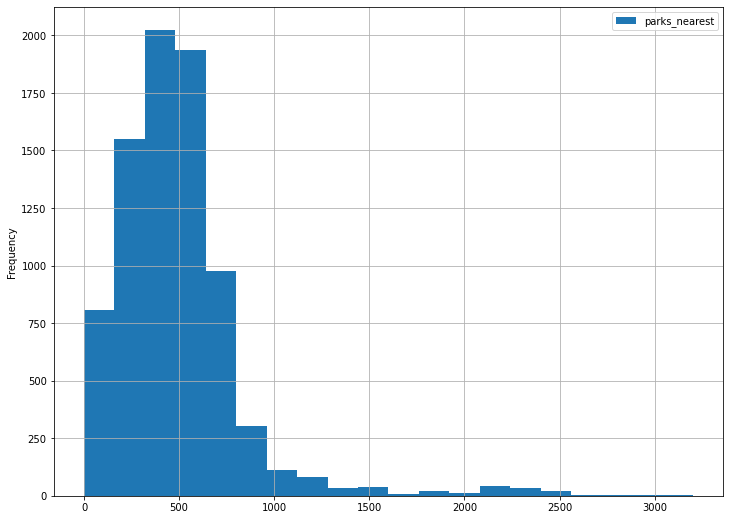

In [32]:
data.plot(y='parks_nearest', kind='hist', bins=20, grid=True, range=(0, 3200), figsize=(12,9))

Наиболее популярны квартиры с расстоянием до парка около 500 м, подавляющее большинство квартир в выборке находятся не дальше, чем около 1000 м до парка.

<AxesSubplot:xlabel='Weekday', ylabel='count'>

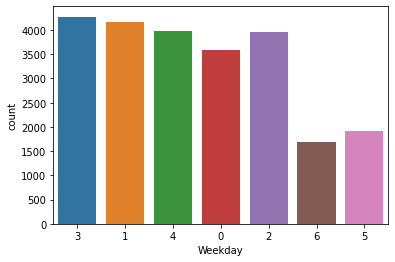

In [33]:
seaborn.countplot(x='Weekday', data=data)

В рабочие дни публикаций больше, чем в выходные.

<AxesSubplot:xlabel='Month', ylabel='count'>

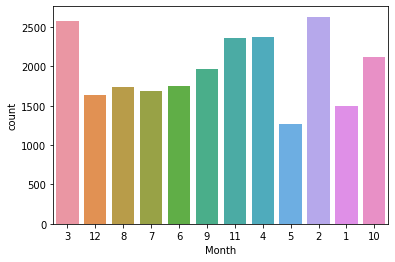

In [34]:
seaborn.countplot(x='Month', data=data)

С февраля по апрель был рост числа публикаций.

**Изучим столбец `days_exposition`**

count    20435.000000
mean       180.485442
std        219.356431
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

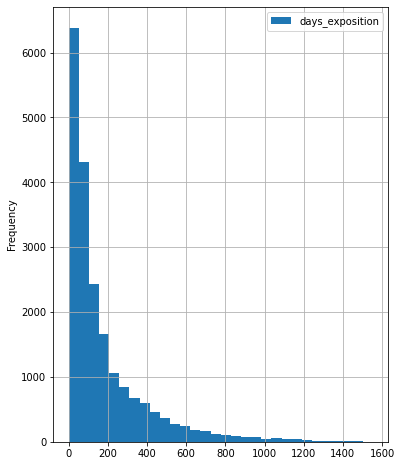

In [35]:
data.plot(y='days_exposition', kind='hist', bins=30, grid=True, range=(0, 1553), figsize=(6,8))
# Изучим значения за пределами "усов":
def treshold (data):
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    IQR=q3-q1
    return (q1-1.5*IQR, q3+1.5*IQR)
treshold(data['days_exposition'])
data['days_exposition'].describe()

# # Рассчитаем среднюю и медиану:
# data['days_exposition'].mean()
# data['days_exposition'].median()


Количество дней публикации, превышающее 549,- слишком долгий срок публикации.
Слишком медленное означение оказалось отрицательным.
В среднем продажа занимает около 180 дней, половина продаж происходила в пределах 104 дней, другая половина занимала больше.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Если интересно, то можно посмотреть на диапазон от 0 до 100 дней. Там есть пики, которым можно найти очень логичное объяснение</div>
</div>

**Какие факторы больше всего влияют на общую (полную) стоимость объекта?**

0.7532837001936552

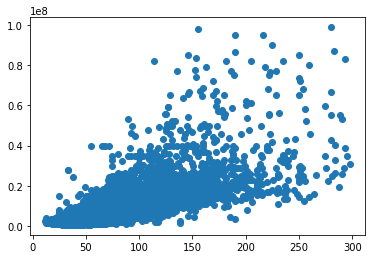

In [36]:
#total_area
plt.scatter(data['total_area'], data['last_price'])
data['total_area'].corr(data['last_price'])
# Можно полагать, что с ростом площади стоимость объекта увеличится.

0.6200753252933173

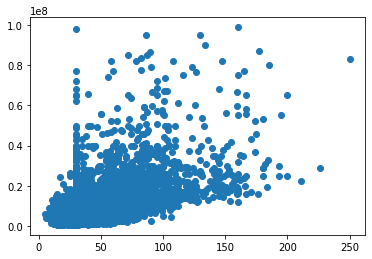

In [37]:
#living_area
plt.scatter(data['living_area'], data['last_price'])
data['living_area'].corr(data['last_price'])
# Также наблюдается положительгая корреляция, но в меньшей степени, чем с общей площадью объекта

0.5493860538276387

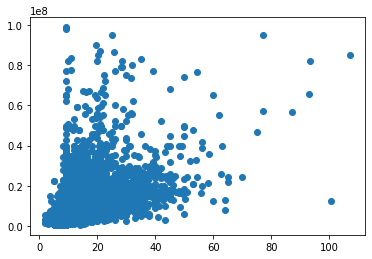

In [38]:
#kitchen_area
plt.scatter(data['kitchen_area'], data['last_price'])
data['kitchen_area'].corr(data['last_price'])
# Корреляция 0,53 говорит о наличии связи, но не слишком сильной.

<AxesSubplot:xlabel='floor_category', ylabel='last_price'>

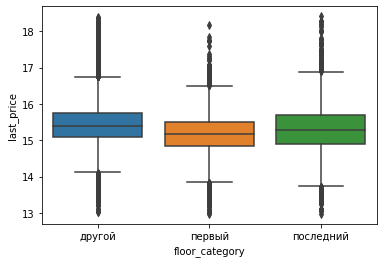

In [39]:
# floor_category
seaborn.boxplot(x=data['floor_category'], y=numpy.log(data['last_price']))
# Медиана стоимости квартир "других" этажей выше, чем у "первого", а квартир на "последних" этажах, видимо, сравнительно мало.

<AxesSubplot:xlabel='Weekday', ylabel='last_price'>

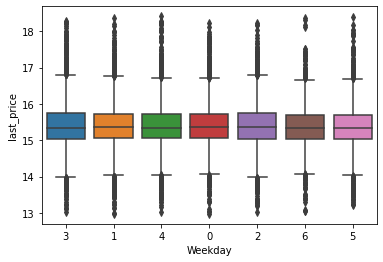

In [40]:
# Weekday
seaborn.boxplot(x=data['Weekday'], y=numpy.log(data['last_price']))
# Графики для разных дней недели выглядят похожими. Зависимость между днем публикации и стоимостью объектов не очевидна.

<AxesSubplot:xlabel='Month', ylabel='last_price'>

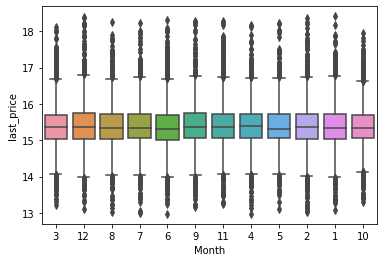

In [41]:
#Month
seaborn.boxplot(x=data['Month'], y=numpy.log(data['last_price']))
# Зависимости от месяца публикации не наблюдается.

<AxesSubplot:xlabel='Year', ylabel='last_price'>

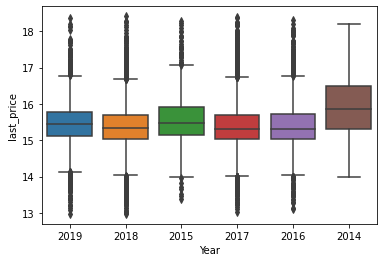

In [42]:
#Year
seaborn.boxplot(x=data['Year'], y=numpy.log(data['last_price']))
# Видно, что в 2014 году цены на недвижимость в данной выборке были выше, чем в остальных годах.

0.45707857332176954


<AxesSubplot:xlabel='rooms', ylabel='last_price'>

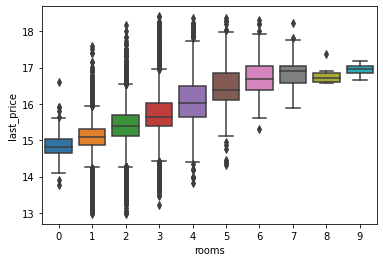

In [43]:
#rooms
print(data['rooms'].corr(data['last_price']))
seaborn.boxplot(x=data['rooms'], y=numpy.log(data['last_price']))

# Видна зависимость, что с увеличением комнат увеличивается цена квартиры; данных по квартир с комнатами от 12 штук слишком мало для репрезентативного результата.

**Средняя цена одного квадратного метра в 10 населённых пунктах**

In [44]:
# Выведем 10 населенных пунктов с наибольшим числом объявлений:
publication_by_locality_name=data.groupby('locality_name')['days_exposition'].count()
list_of_names=publication_by_locality_name.sort_values(ascending=False).head(10).index
list_of_names

Index(['Санкт-Петербург', 'Мурино', 'Кудрово', 'посёлок Шушары', 'Всеволожск',
       'Колпино', 'Пушкин', 'посёлок Парголово', 'Гатчина', 'Выборг'],
      dtype='object', name='locality_name')

In [45]:
# Рассчитаем цены за квадратный метр в вышеназванных населенных пунктах:
for x in list_of_names:
    print(x, data[data['locality_name']==x]['price_per_meter'].mean())

Санкт-Петербург 113525.55320881843
Мурино 86061.67701443135
Кудрово 95324.93054392203
посёлок Шушары 78677.3642167513
Всеволожск 68654.4739860316
Колпино 75333.29580052708
Пушкин 103130.8517435364
посёлок Парголово 90175.91345801107
Гатчина 68746.14676333922
Выборг 58141.90915331862


In [46]:
# print(min(data[data['locality_name'].isin(list_of_names)]['price_per_meter']))
# print(max(data[data['locality_name'].isin(list_of_names)]['price_per_meter']))

print(data.loc[data['price_per_meter']==min(data[data['locality_name'].isin(list_of_names)]['price_per_meter'])]['locality_name'])
print(data.loc[data['price_per_meter']==max(data[data['locality_name'].isin(list_of_names)]['price_per_meter'])]['locality_name'])


23477    Гатчина
Name: locality_name, dtype: object
4859     Санкт-Петербург
17172    Санкт-Петербург
Name: locality_name, dtype: object


**Средняя цена каждого километра квартир в Санкт-Петербурге до центра города**

In [47]:
# Рассчитаем цену за метр от центра Санкт-Петербурга
data.loc[data.loc[:, 'locality_name']=='Санкт-Петербург']
data['price_per_kilometer']=data['last_price']/(data['cityCenters_nearest'])
# Рассчитаем цену за километр:
price_for_kilometer=(data['price_per_kilometer']*1000).mean()
print(price_for_kilometer)

# Средняя цена за километр до центра: 1 334 681.

1149533.8733550292


-0.3069566255558402


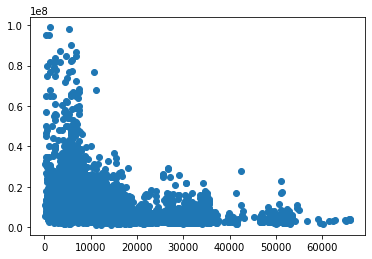

In [48]:
print(data['cityCenters_nearest'].corr(data['last_price']))
plt.scatter(data['cityCenters_nearest'], data['last_price'])
# Чем дальше от центра, тем дешевле квартира.

In [49]:
data['rounded_centre_distance']=data['rounded_centre_distance'].fillna(-1)
pivot_table_distance_mean=data.query('locality_name=="Санкт-Петербург" and rounded_centre_distance !=-1').pivot_table(index='rounded_centre_distance', values='price_per_meter', aggfunc='mean')
print(pivot_table_distance_mean)
pivot_table_distance_median=data.query('locality_name=="Санкт-Петербург" and rounded_centre_distance !=-1').pivot_table(index='rounded_centre_distance', values='price_per_meter', aggfunc='median')
print(pivot_table_distance_median)

                         price_per_meter
rounded_centre_distance                 
0.0                        231767.956010
1.0                        154823.371621
2.0                        147924.416562
3.0                        120996.500646
4.0                        128506.326593
5.0                        137737.812548
6.0                        145186.628445
7.0                        153364.821436
8.0                        125097.739662
9.0                        113321.952734
10.0                       112849.429062
11.0                       108630.835324
12.0                       107511.497831
13.0                       108119.867212
14.0                       104260.829623
15.0                       104304.605920
16.0                       100542.613949
17.0                        96601.846018
18.0                        96392.000314
19.0                        98652.736027
20.0                       103056.539879
21.0                        94469.584582
22.0            

Наблюдается тенденция к снижению цены (как средней, так и медианной) за квадратный метр квартиры в Санкт-Петербурге по мере удаления от центра.

**Промежуточный вывод:**
изучили, какие факторы влияют на полную стоимость объекта, построив графики и рассчитав корреляцию от выбранных параметров.

### Общий вывод

В результате ознакомления с нашим датасетом выяснилось, что необходимо осуществить предобработку данных, а именно заполннить пропуски (там, где это возможно), измененить типы данных, удалить неявные дубликаты, осуществить категоризацию данных а также поработать с выбивающимися значениями. Были выявлены строки со странными значениями, которые вряд ли можно встретить в действительности; такие строки были удалены. В результате выборка сохранилась на 99,5%.

Добавлены новые столбцы после расчета и обработки следующих показателей:
цена одного квадратного метра (минимальное значение - около 8000 руб., а максимальное - около 2 млн руб.); день, месяц, год публикации объявления, тип этажа квартиры; расстояние до центра города в километрах (округленные до целых значений).

В результате исследования предоставленных данных на рынке недвижимости в Санкт-Петербурге и Ленинградской области можно выявить следующие общие тенденции:

>наиболее популярны однокомнатные квартиры общей площадью около 50м2, жилой площадью около 18-20 м2 и 30м2 по ценам примерно от немного более 3 до чуть менее 9 млн руб. с потолками высотой от 2,5 до 3 м в пятиэтажных, а также девятиэтажных домах; наиболее популярные квартиры - это квартиры ни на первом, ни на последних этажах. Объявления с квартирами на последних этажах встречаются немного чаще, чем на первых

>почти все квартиры в выборке расположены не более, чем в 60 км до аэропорта; наиболее часто встречающееся значение при этом - в районе 30 км до аэропорта

>в выборке также чаще всего встречаются квартиры с расстоянием до парка около 500 м, подавляющее большинство квартир в выборке находятся не дальше, чем около 1000 м до парка

>наиболее популярны квартиры с расстоянием до центра примерно 15 км

>с февраля по апрель был рост числа публикаций; наиболее активные месяца с точки зрения публикаций объявление - февраль-март

>среди факторов, влияющих на цену квартир: общая площадь (с ростом площади стоимость объекта увеличится); жилая площадь (но в меньшей степени, чем общая площадь объекта); количество комнат (с увеличением комнат увеличивается цена квартиры)

>Минимальная цена (несредняя) среди топ10 по количеству объявлений за квадратный метр наблюдается в Гатчине, а максимальная (несредняя) в Санкт-Петербурге.
Минимальная средняя среди топ10 по количеству объявленийнаблюдается в Выборге, а максимальная средняя в Санкт-Петербурге.

>Наблюдается тенденция к снижению цены (как средней, так и медианной) за квадратный метр квартиры в Санкт-Петербурге по мере удаления от центра.